In [3]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers
from tensorflow.keras import models
import matplotlib.pyplot as plt 
import numpy as np


C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [4]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


In [5]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

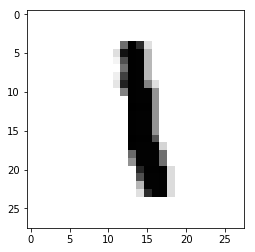

In [6]:
digit = train_images[6] 
plt.imshow(digit, cmap=plt.cm.binary) 
plt.show()

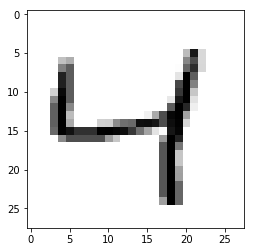

In [7]:
digit = train_images[2] 
plt.imshow(digit, cmap=plt.cm.binary) 
plt.show()

In [8]:
train_labels[0]

5

In [9]:
train_images.shape

(60000, 28, 28)

In [10]:
len(train_labels)

60000

In [11]:
len(train_images)

60000

In [12]:
len(test_images)

10000

In [13]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [14]:
network = models.Sequential() 
network.add(layers.Dense(500, activation='relu', input_shape=(28 * 28,))) 
network.add(layers.Dense(10, activation='softmax'))

In [15]:
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images= test_images.reshape((10000, 28 * 28))
test_images= test_images.astype('float32') / 255



In [17]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels) 
test_labels = to_categorical(test_labels)


In [18]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 96us/sample - loss: 0.2602 - accuracy: 0.9244
Epoch 2/5
60000/60000 [==============================] - 4s 67us/sample - loss: 0.1068 - accuracy: 0.9688
Epoch 3/5
60000/60000 [==============================] - 4s 58us/sample - loss: 0.0702 - accuracy: 0.9789
Epoch 4/5
60000/60000 [==============================] - 4s 66us/sample - loss: 0.0516 - accuracy: 0.9841
Epoch 5/5
60000/60000 [==============================] - 3s 57us/sample - loss: 0.0387 - accuracy: 0.9883


In [20]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc) 